In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing datasets
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#from the above info in train data, it shows that there are some missing values in dataset

#Age values is missing also from cabin

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
#checking the sum of null value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

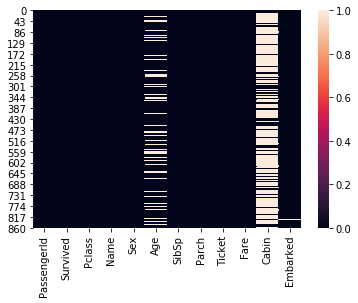

In [16]:
#showing in heatmap
sns.heatmap(train.isnull())

In [17]:
#from above heatmap we can clearly show the missing or NaN values in column Age and Cabin

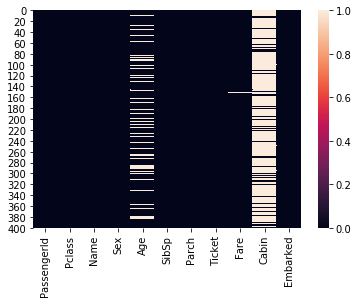

In [18]:
#showing in heatmap
sns.heatmap(test.isnull())

In [19]:
#Finding the unique values 
def getUniqueValues(colname):
    uniquevalues = train[colname].unique()
    print(uniquevalues)

In [20]:
collist = ['Survived','Pclass','Sex','SibSp','Parch','Cabin','Embarked']
#train.columns
#for col in train.columns:
for col in collist:
    print('Unique values for', col)
    getUniqueValues(col)



Unique values for Survived
[0 1]
Unique values for Pclass
[3 1 2]
Unique values for Sex
['male' 'female']
Unique values for SibSp
[1 0 3 4 2 5 8]
Unique values for Parch
[0 1 2 5 3 4 6]
Unique values for Cabin
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24

Survived => 0 = No, 1 = Yes

Pclass => 1 = 1st class, 2 = 2nd class, 3 = 3rd class

SibSp => It is the column which shows Sibling/Spouse

Parch => Parents children abord

Embarked => C, Q, S

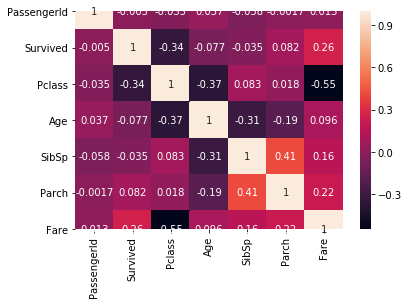

In [21]:
sns.heatmap(train.corr(),annot=True)

In [22]:
#Droping Name column from test dataset also passenger id because it is autoincrement and not related with Survived

test.drop(['Name'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
#Droping Name column from train and test dataset

train.drop(['Name'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#encoding sex col with label encoder
le = LabelEncoder()

train['Sex'] =  le.fit_transform(train['Sex'])
test['Sex'] =  le.fit_transform(test['Sex'])


In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
#Replacing NaN value of Age

imp = Imputer(missing_values='NaN',strategy='mean')
train['Age'] = imp.fit_transform(train['Age'].values.reshape(-1,1))
test['Age'] = imp.fit_transform(test['Age'].values.reshape(-1,1))

In [28]:
#Replacing NaN value of Cabin with most_frequent strategy
print('Null values in Cabin :', train['Cabin'].isnull().sum())
imp = SimpleImputer(strategy='most_frequent')
train['Cabin'] = imp.fit_transform(train['Cabin'].values.reshape(-1,1))
test['Cabin'] = imp.fit_transform(test['Cabin'].values.reshape(-1,1))
print('Null values in Cabin :', train['Cabin'].isnull().sum())

Null values in Cabin : 687
Null values in Cabin : 0


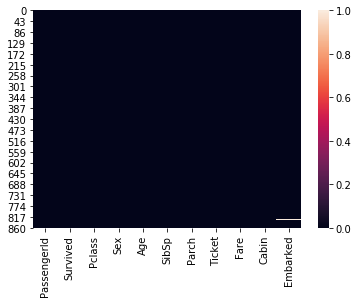

In [29]:
sns.heatmap(train.isnull())

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [31]:
#Replacing NaN value of Embarked with most_frequent strategy
print('Null values in Embarked :', train['Embarked'].isnull().sum())
imp = SimpleImputer(strategy='most_frequent')
train['Embarked'] = imp.fit_transform(train['Embarked'].values.reshape(-1,1))
print('Null values in Embarked :', train['Embarked'].isnull().sum())

Null values in Embarked : 2
Null values in Embarked : 0


In [32]:
#Encoding Embarked
train['Embarked'] =  le.fit_transform(train['Embarked'])
test['Embarked'] =  le.fit_transform(test['Embarked'])

In [33]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [35]:
test['Fare'].dtypes

dtype('float64')

In [36]:
#Replacing NaN value of Age

imp = Imputer(missing_values='NaN',strategy='mean')
test['Fare'] = imp.fit_transform(test['Fare'].values.reshape(-1,1))

In [37]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

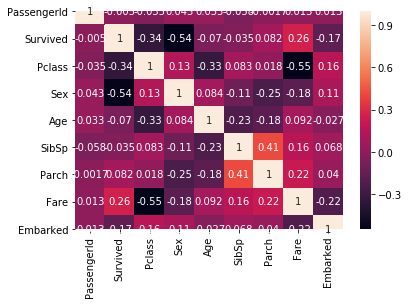

In [38]:
sns.heatmap(train.corr(),annot=True)

In [39]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [40]:
#Encoding Cabin
train['Cabin'] =  le.fit_transform(train['Cabin'])
test['Cabin'] =  le.fit_transform(test['Cabin'])

In [41]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [42]:
train.drop(['Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,47,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,47,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,47,2


In [43]:
test.drop(['Ticket'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,15,1
1,893,3,0,47.0,1,0,7.0000,15,2
2,894,2,1,62.0,0,0,9.6875,15,1
3,895,3,1,27.0,0,0,8.6625,15,2
4,896,3,0,22.0,1,1,12.2875,15,2


# VISUALIZING DATA

In [44]:
# from the above info we can say that sex, cabin, class parch, sibsp are the feature we can analyse

In [45]:
#finding total no of males and females
#Male = 1
#Female = 0
print('Total Male = ',len(train[(train["Sex"] == 1)].index))
print('Total Female = ',len(train[(train["Sex"] == 0)].index))

Total Male =  577
Total Female =  314


In [46]:
#Total no of male and female survived

survived_male = len(train[(train["Sex"]==1) & (train["Survived"]==1)].index)
survived_female = len(train[(train["Sex"]==0) & (train["Survived"]==1)].index)

print("Survived Female: ",survived_female)
print("Survived Male: ",survived_male)

Survived Female:  233
Survived Male:  109


In [47]:
#Total no of male and female dead

dead_male = len(train[(train["Sex"]==1) & (train["Survived"]==0)].index)
dead_female = len(train[(train["Sex"]==0) & (train["Survived"]==0)].index)

print("Dead Female: ",dead_female)
print("Dead Male: ",dead_male)

Dead Female:  81
Dead Male:  468


In [48]:
#displaying Survived and dead with function

def bar_chart(colname):
    survived = train[train['Survived']==1][colname].value_counts()
    dead = train[train['Survived']==0][colname].value_counts()
    
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

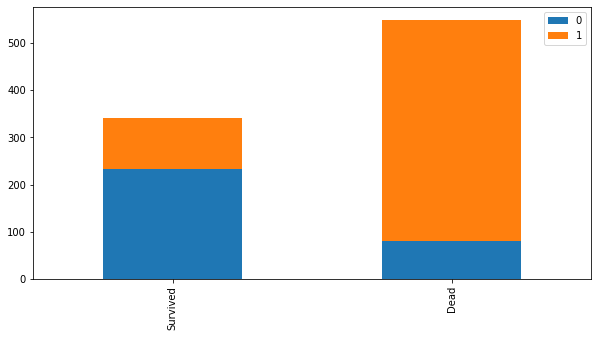

In [49]:
bar_chart('Sex')

In [50]:
#From the above observation we can say that most mens are not survived.
#Women more likely to survived than men

In [51]:
#finding total no of passengers w.r.t pclass

train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [52]:
print('PClass 1 = ',len(train[(train["Pclass"] == 1)].index))
print('PClass 2 = ',len(train[(train["Pclass"] == 2)].index))
print('PClass 3 = ',len(train[(train["Pclass"] == 3)].index))


#tot_pass = train['Pclass'].value_counts().sort_index()

PClass 1 =  216
PClass 2 =  184
PClass 3 =  491


In [53]:
#finding the survival with respect to class
survived_firstclass = len(train[(train['Survived']==1) & (train['Pclass']==1)].index)
survived_secclass = len(train[(train['Survived']==1) & (train['Pclass']==2)].index)
survived_thirdclass = len(train[(train['Survived']==1) & (train['Pclass']==3)].index)

print("First Class Passengers Survived: ",survived_firstclass)
print("Second Class Passengers Survived: ",survived_secclass)
print("Third Class Passengers Survived: ",survived_thirdclass)

First Class Passengers Survived:  136
Second Class Passengers Survived:  87
Third Class Passengers Survived:  119


In [54]:
# by using group by and sum function
survived_pclass = [train.groupby('Pclass')["Survived"].sum()]
print(survived_pclass)

[Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64]


In [55]:
#finding the dead with respect to class
dead_firstclass = len(train[(train['Survived']==0) & (train['Pclass']==1)].index)
dead_secclass = len(train[(train['Survived']==0) & (train['Pclass']==2)].index)
dead_thirdclass = len(train[(train['Survived']==0) & (train['Pclass']==3)].index)

print("First Class Passengers Not Survived: ",dead_firstclass)
print("Second Class Passengers Not Survived: ",dead_secclass)
print("Third Class Passengers Not Survived: ",dead_thirdclass)

First Class Passengers Not Survived:  80
Second Class Passengers Not Survived:  97
Third Class Passengers Not Survived:  372


In [56]:
print([train.groupby('Pclass')["Survived"].value_counts(normalize=True)])

[Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64]


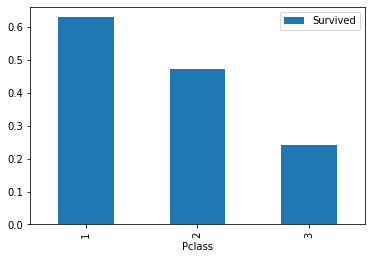

In [57]:
pivot = train.pivot_table(index="Pclass",values="Survived")
pivot.plot.bar()

plt.show()

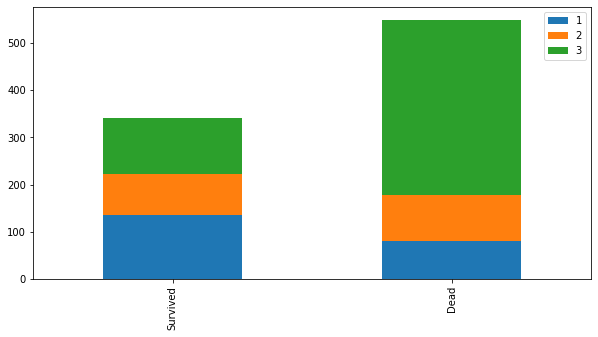

In [58]:
bar_chart('Pclass')

In [59]:
#from above we can say that many 3rd class people not survived

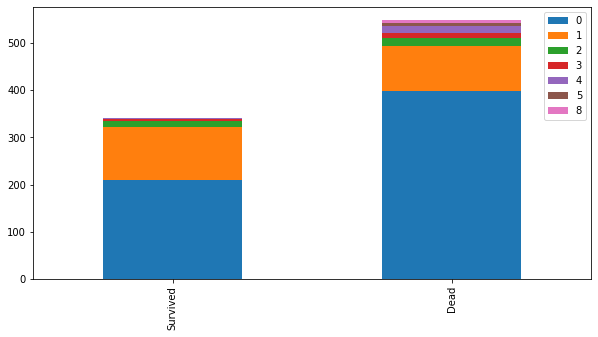

In [60]:
bar_chart('SibSp')

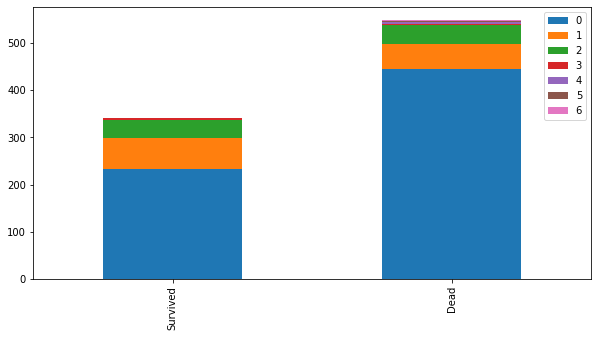

In [61]:
bar_chart('Parch')

In [62]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


PassengerId        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Survived        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Pclass          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Sex             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Age               AxesSubplot(0.125,0.518913;0.168478x0.16413)
SibSp          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Parch          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Fare           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Cabin             AxesSubplot(0.125,0.321957;0.168478x0.16413)
Embarked       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

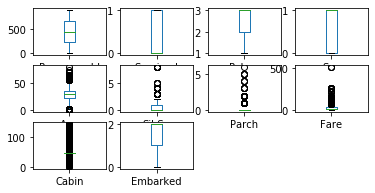

In [63]:
#Plotting all values in box plot
train.plot(kind='box',subplots=True,layout=(4,4))

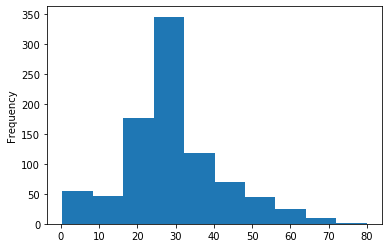

In [64]:
train['Age'].plot.hist()

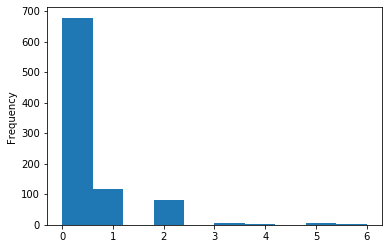

In [65]:
train['Parch'].plot.hist()

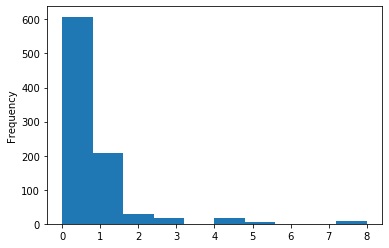

In [66]:
train['SibSp'].plot.hist()

In [67]:
train = pd.DataFrame(train)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,47,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,47,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,47,2


In [71]:
train_y = train.iloc[:,1:2]

train_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [73]:
train_x = train.iloc[:,2:]
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,47,2
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,47,2
3,1,0,35.000000,1,0,53.1000,55,2
4,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,47,2
887,1,0,19.000000,0,0,30.0000,30,2
888,3,0,29.699118,1,2,23.4500,47,2
889,1,1,26.000000,0,0,30.0000,60,0


In [74]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,15,1
1,893,3,0,47.0,1,0,7.0000,15,2
2,894,2,1,62.0,0,0,9.6875,15,1
3,895,3,1,27.0,0,0,8.6625,15,2
4,896,3,0,22.0,1,1,12.2875,15,2


In [75]:
test_x = test.iloc[:,1:]

test_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.50000,0,0,7.8292,15,1
1,3,0,47.00000,1,0,7.0000,15,2
2,2,1,62.00000,0,0,9.6875,15,1
3,3,1,27.00000,0,0,8.6625,15,2
4,3,0,22.00000,1,1,12.2875,15,2
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,15,2
414,1,0,39.00000,0,0,108.9000,22,0
415,3,1,38.50000,0,0,7.2500,15,2
416,3,1,30.27259,0,0,8.0500,15,2


### CROSS VALIDATION

In [76]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix

### KNN

In [77]:
def cross_val_function(model):
    score = cross_val_score(model,train_x,train_y,cv=5,scoring='accuracy')

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(knn,train_x,train_y,cv=3,scoring='accuracy')

print('Cross Val Score: ', score)
print('Mean Scores: ',score.mean())
print('Standard deviation: ',score.std())

print('Score :', round(score.mean()*100))

Cross Val Score:  [0.68013468 0.72053872 0.75420875]
Mean Scores:  0.7182940516273849
Standard deviation:  0.030282239199174055
Score : 72.0


### DECISION TREE CLASSIFIER

In [79]:
from sklearn.tree import DecisionTreeClassifier

#using criterion='gini'
dct = DecisionTreeClassifier() 

cross_val_function(dct)

Cross Val Score:  [0.75418994 0.77094972 0.80337079 0.76966292 0.81355932]
Mean Scores:  0.7823465389407072
Standard deviation:  0.022359840194362116
Score : 78.0


In [80]:
#using criterion='gini'
dcte = DecisionTreeClassifier(criterion='entropy') 

cross_val_function(dcte)

Cross Val Score:  [0.75418994 0.75977654 0.81460674 0.79213483 0.79096045]
Mean Scores:  0.7823337010916074
Standard deviation:  0.02241842486801109
Score : 78.0


### RANDOM FOREST

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42) 
cross_val_function(rf)

Cross Val Score:  [0.78212291 0.82681564 0.84269663 0.7752809  0.85310734]
Mean Scores:  0.816004684041738
Standard deviation:  0.03166179340845217
Score : 82.0


### SVM

In [82]:
from sklearn.svm import SVC

svc = SVC()
cross_val_function(svc)


Cross Val Score:  [0.57541899 0.66480447 0.68539326 0.74157303 0.77966102]
Mean Scores:  0.689370154554227
Standard deviation:  0.06997390358911551
Score : 69.0


In [83]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cross_val_function(gnb)

Cross Val Score:  [0.7150838  0.77094972 0.80898876 0.79213483 0.82485876]
Mean Scores:  0.7824031744241676
Standard deviation:  0.0381236282309969
Score : 78.0


###### RANDOM FOREST IS GIVING HIGHEST ACCURACY 

In [84]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [85]:
prediction = rf.predict(test_x)

In [92]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [93]:
final_output = pd.DataFrame({"PassengerId":test['PassengerId'],"Survived":prediction})

In [94]:
#expoorting data to CSV

final_output.to_csv("titanic_prediction.csv",index=False)

In [95]:
final_output = pd.read_csv('titanic_prediction.csv')

final_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [98]:
#exporting model

from sklearn.externals import joblib

#Save the model as a pickle in a file

joblib.dump(rf,'titanic_prediction.pkl')

#Load the model from the file
reading_from_joblib = joblib.load('titanic_prediction.pkl')

In [99]:
reading_from_joblib.predict(test_x)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,